In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Text preprocessing and NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Set random seed for reproducibility
np.random.seed(42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
# Load the dataset
df = pd.read_csv('Phishing_Email.csv')

# Display basic information
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check class distribution
print("\nClass Distribution:")
print(df['Email Type'].value_counts())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB
None

First 5 rows:
   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  

Class Distribution:
Email Type
Safe Email        11322
Phishing Email     73

In [3]:
# Convert labels to binary (0 = Safe, 1 = Phishing)
df['label'] = df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)
df.head()

,Unnamed: 0,Email Text,Email Type,label
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,0
1,1,the other side of * galicismos * * galicismo *...,Safe Email,0
2,2,re : equistar deal tickets are you still avail...,Safe Email,0
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,1
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,1


In [6]:
def clean_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters, numbers, and punctuation
        text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

        # Tokenize
        tokens = nltk.word_tokenize(text)

        # Remove stopwords
        tokens = [t for t in tokens if t not in stop_words]

        # Stemming or Lemmatization (using lemmatization here)
        tokens = [lemmatizer.lemmatize(t) for t in tokens]

        # Join tokens back to string
        clean_text = ' '.join(tokens)

        return clean_text
    else:
        # Handle non-string values (e.g., return empty string)
        return ''

# Apply cleaning to all emails
df['clean_text'] = df['Email Text'].apply(clean_text)
df.head()

,Unnamed: 0,Email Text,Email Type,label,clean_text
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,0,disc uniformitarianism sex lang dick hudson ob...
1,1,the other side of * galicismos * * galicismo *...,Safe Email,0,side galicismos galicismo spanish term name im...
2,2,re : equistar deal tickets are you still avail...,Safe Email,0,equistar deal ticket still available assist ro...
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,1,hello hot lil horny toy one dream open minded ...
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,1,software incredibly low price lower drapery se...


In [9]:
# Basic text features
df['email_length'] = df['Email Text'].astype(str).apply(len)
df['word_count'] = df['Email Text'].astype(str).apply(lambda x: len(nltk.word_tokenize(x)))
df['avg_word_length'] = df['Email Text'].astype(str).apply(lambda x: np.mean([len(w) for w in nltk.word_tokenize(x)]))
df['capital_ratio'] = df['Email Text'].astype(str).apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)
df['special_char_count'] = df['Email Text'].astype(str).apply(lambda x: len(re.findall(r'[^\w\s]', x)))
df['link_count'] = df['Email Text'].astype(str).apply(lambda x: len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))) # Change the type of 'Email Text' to string first

# Display new features
print("\nNew Features:")
print(df[['email_length', 'word_count', 'avg_word_length', 'capital_ratio', 'special_char_count', 'link_count', 'label']].head())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



New Features:
   email_length  word_count  avg_word_length  capital_ratio  \
0          1030         230         3.500000       0.000000   
1           479          91         4.274725       0.000000   
2          1245         305         3.085246       0.000000   
3           688         116         4.551724       0.056686   
4           441          91         3.857143       0.000000   

   special_char_count  link_count  label  
0                  61           0      0  
1                  18           0      0  
2                  96           0      0  
3                  65           1      1  
4                  27           0      1  


In [10]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert to DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine with other features
X = pd.concat([
    tfidf_df,
    df[['email_length', 'word_count', 'avg_word_length', 'capital_ratio', 'special_char_count', 'link_count']]
], axis=1)
y = df['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (14920, 5006)
Test set shape: (3730, 5006)


In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 0.9539
Precision: 0.9407
Recall: 0.9420
F1 Score: 0.9414
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2264
           1       0.94      0.94      0.94      1466

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730


Training Random Forest...
Random Forest Results:
Accuracy: 0.9614
Precision: 0.9377
Recall: 0.9659
F1 Score: 0.9516
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2264
           1       0.94      0.97      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730


Training Neural Network...
Neural Network Results:
Accuracy: 0.9426
Precision: 0.8917
Recall: 0.9720
F1 Score: 0.9302
              


Model Comparison:
                     accuracy  precision    recall        f1
Random Forest        0.961394   0.937748  0.965894  0.951613
Logistic Regression  0.953887   0.940736  0.942019  0.941377
Neural Network       0.942627   0.891740  0.972033  0.930157


<Figure size 1200x600 with 0 Axes>

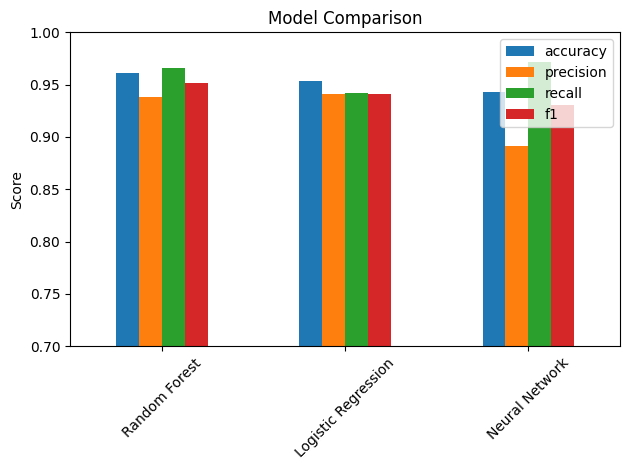

In [13]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame.from_dict({k: v for k, v in results.items() if k != 'model'}, orient='index')
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1']].sort_values('f1', ascending=False)

print("\nModel Comparison:")
print(comparison_df)

# Plot comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', y=['accuracy', 'precision', 'recall', 'f1'],
                   title='Model Comparison', ylim=(0.7, 1.0))
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.tight_layout()
plt.show()

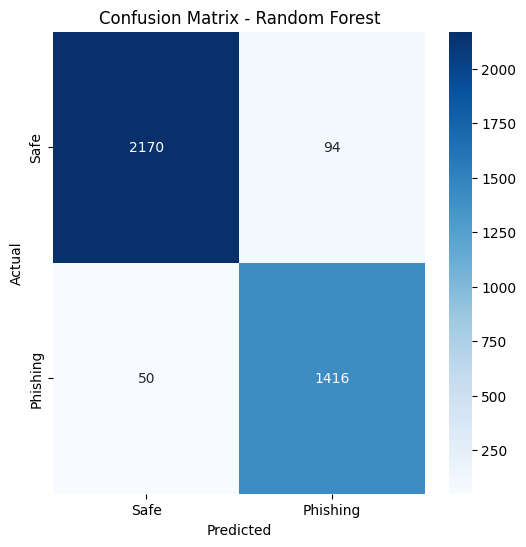

In [14]:
best_model_name = comparison_df.index[0]
best_model = results[best_model_name]['model']
y_pred = results[best_model_name]['y_pred']

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Safe', 'Phishing'],
            yticklabels=['Safe', 'Phishing'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

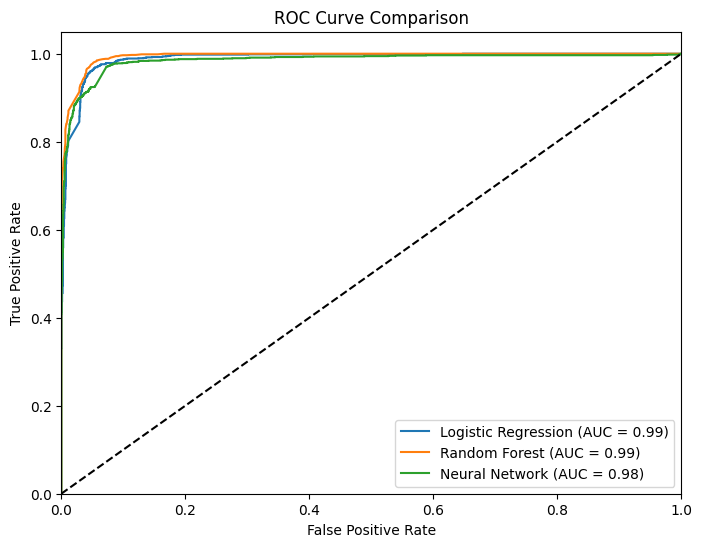

In [15]:
plt.figure(figsize=(8, 6))
for name, result in results.items():
    if result['y_prob'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

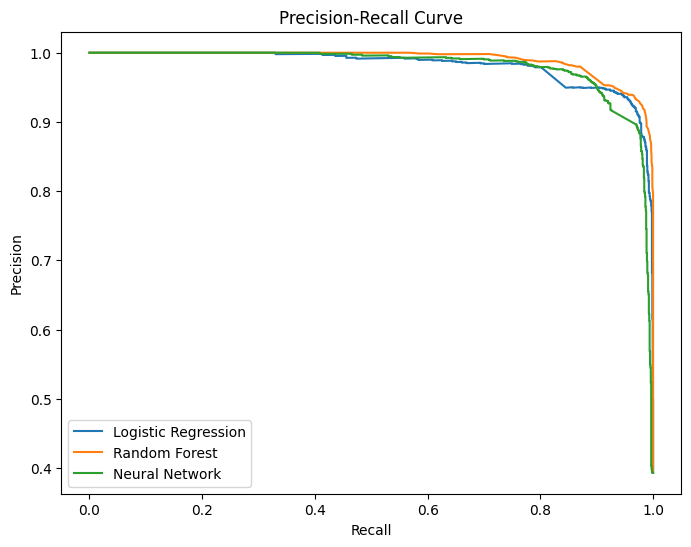

In [16]:
plt.figure(figsize=(8, 6))
for name, result in results.items():
    if result['y_prob'] is not None:
        precision, recall, _ = precision_recall_curve(y_test, result['y_prob'])
        plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

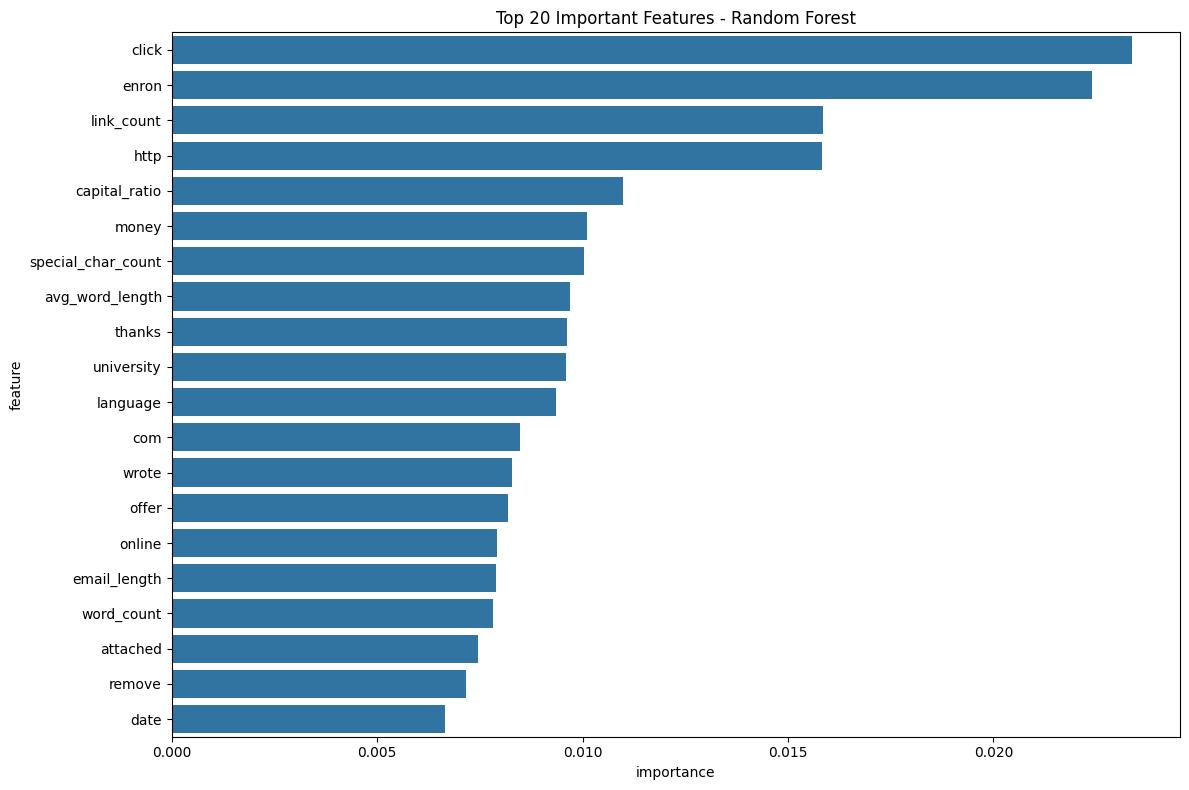

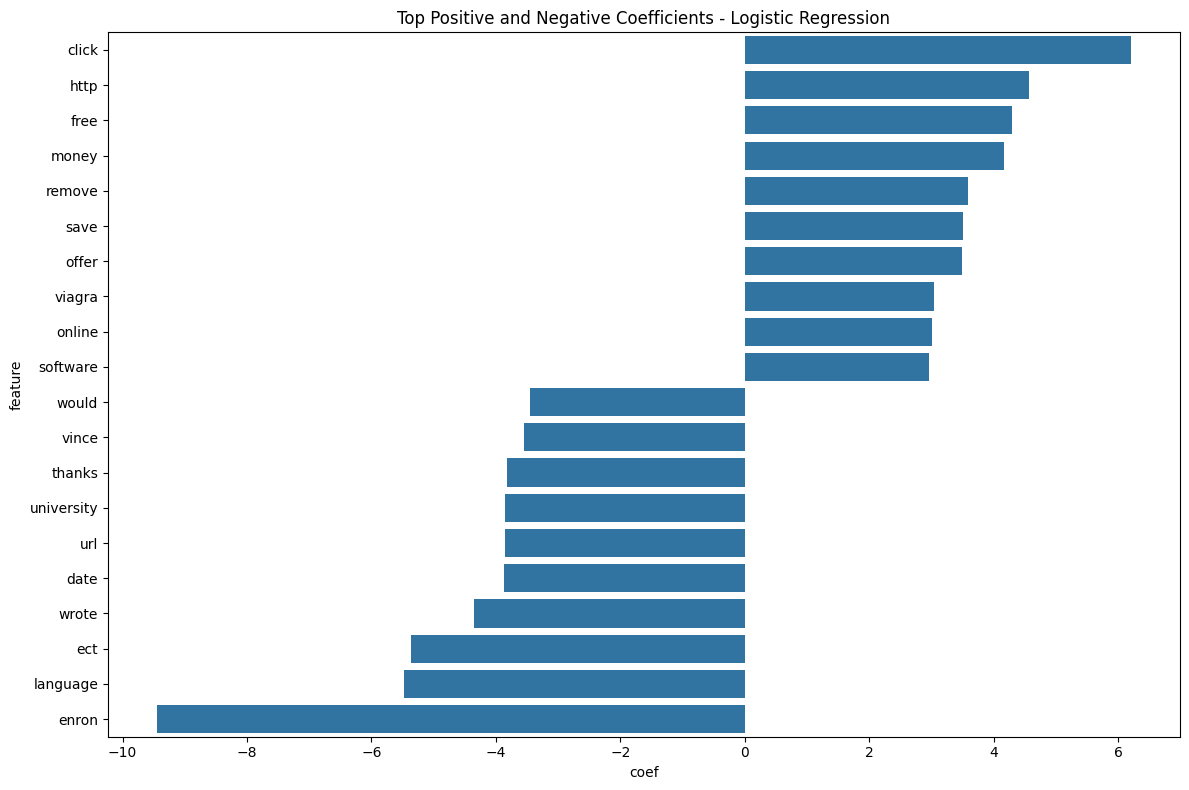

In [17]:
# For Random Forest
if 'Random Forest' in models:
    rf = results['Random Forest']['model']
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature',
                data=feature_importances.head(20))
    plt.title('Top 20 Important Features - Random Forest')
    plt.tight_layout()
    plt.show()

# For Logistic Regression
if 'Logistic Regression' in models:
    lr = results['Logistic Regression']['model']
    coefs = pd.DataFrame({
        'feature': X.columns,
        'coef': lr.coef_[0]
    }).sort_values('coef', ascending=False)

    # Plot top positive and negative coefficients
    top_coefs = pd.concat([coefs.head(10), coefs.tail(10)])
    plt.figure(figsize=(12, 8))
    sns.barplot(x='coef', y='feature', data=top_coefs)
    plt.title('Top Positive and Negative Coefficients - Logistic Regression')
    plt.tight_layout()
    plt.show()

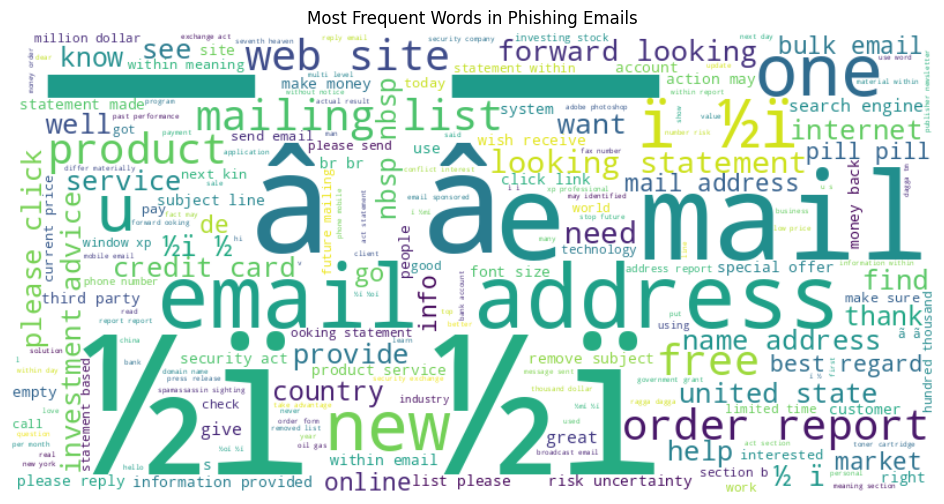

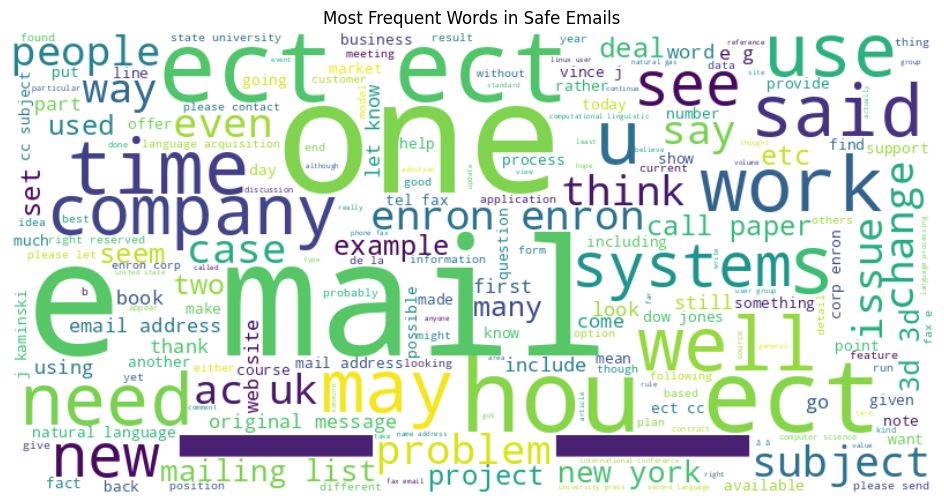

In [18]:
# Word cloud for phishing emails
phishing_text = ' '.join(df[df['label'] == 1]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phishing_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Phishing Emails')
plt.show()

# Word cloud for safe emails
safe_text = ' '.join(df[df['label'] == 0]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(safe_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Safe Emails')
plt.show()

In [20]:
# Select the best model based on F1 score
final_model = results[comparison_df.index[0]]['model']

# Save the model and vectorizer for deployment
import joblib

joblib.dump(final_model, 'phishing_email_detector.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("\nFinal model saved as 'phishing_email_detector.pkl'")
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")


Final model saved as 'phishing_email_detector.pkl'
TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'


In [22]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import joblib

import warnings
warnings.filterwarnings("ignore")

# Load the trained model and vectorizer
try:
    model = joblib.load('phishing_email_detector.pkl')
    vectorizer = joblib.load('tfidf_vectorizer.pkl')
except Exception as e:
    print(f"Error loading model files: {e}")
    exit()

# Text cleaning function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    # Join tokens back to string
    return ' '.join(tokens)

def extract_features(email_text):
    # Clean the text
    clean_email = clean_text(email_text)

    # Vectorize the text
    text_features = vectorizer.transform([clean_email])

    # Create feature DataFrame
    features = pd.DataFrame(text_features.toarray(),
                          columns=vectorizer.get_feature_names_out())

    # Add engineered features
    features['email_length'] = len(email_text)
    features['word_count'] = len(nltk.word_tokenize(email_text))
    features['avg_word_length'] = np.mean([len(w) for w in nltk.word_tokenize(email_text)])
    features['capital_ratio'] = sum(1 for c in email_text if c.isupper()) / len(email_text) if len(email_text) > 0 else 0
    features['special_char_count'] = len(re.findall(r'[^\w\s]', email_text))
    features['link_count'] = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_text))

    return features

def classify_email(email_text):
    # Extract features
    features = extract_features(email_text)

    # Make prediction
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0] if hasattr(model, 'predict_proba') else None

    # Return results
    result = {
        'prediction': 'Phishing Email' if prediction == 1 else 'Safe Email',
        'probability': probability,
        'features': {
            'email_length': features['email_length'][0],
            'word_count': features['word_count'][0],
            'link_count': features['link_count'][0]
        }
    }
    return result

# Main interactive loop
print("Phishing Email Detector")
print("Type 'quit' to exit\n")

while True:
    # Get user input
    email_text = input("Enter the email text to analyze:\n")

    if email_text.lower() == 'quit':
        break

    if not email_text.strip():
        print("Please enter some text to analyze.")
        continue

    # Classify the email
    result = classify_email(email_text)

    # Display results
    print("\nResults:")
    print(f"Classification: {result['prediction']}")

    if result['probability'] is not None:
        print(f"Confidence: {max(result['probability'])*100:.1f}%")

    print("\nKey Features:")
    print(f"- Email Length: {result['features']['email_length']} characters")
    print(f"- Word Count: {result['features']['word_count']} words")
    print(f"- Links Found: {result['features']['link_count']}")

    print("\n" + "="*50 + "\n")

print("Goodbye!")

Phishing Email Detector
Type 'quit' to exit

Enter the email text to analyze:
Dear customer, your account has been compromised. Click immediately to verify your identity: http://bank-verify.com/secure

Results:
Classification: Phishing Email
Confidence: 69.0%

Key Features:
- Email Length: 122 characters
- Word Count: 19 words
- Links Found: 1


Enter the email text to analyze:
quit
Goodbye!
